<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod2/reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod2/reg.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>


__[Regression](https://en.wikipedia.org/wiki/Regression_analysis)__

_homl3 ch4_

- Linear Regression
  - The Normal Equation
  - Computational Complexity
  - Gradient Descent
    - Batch Gradient Descent
    - Stochastic Gradient Descent
    - Mini-Batch Gradient Descent
- Polynomial Regression
  - Learning Curves
  - Regularized Linear Models
    - Ridge Regression
    - Lasso Regression
    - Elastic Net Regression
    - Early Stopping
- Logistic Regression
  - Estimating Probabilities
  - Training and Cost Function
  - Decision Boundaries
  - Softmax Regression

What is regression?
---
Given $N$ samples $\lbrace (\vec{x_1},y_1),(\vec{x_2},y_2), ⋯, (\vec{x_N},y_N) \rbrace$, 
- $\vec{x_i}$: feature vector of sample $i$
  - $\vec{x_i}∈X$, sample or features space
- $y_i$: sample $i$'s target value, a real number
  - $y_i∈Y$, a subset of real number $R$

Training a machine learning model $m_{\vec{α}}: \hat{y}=m_{\vec{α}}(\vec{x},y)$ is the process of optimizing its parameter vector $\vec{α}=(α_1,α_2,⋯,α_M)$ in its parameter space $\mathcal{Α}$ to find the $\vec{α^*}$ which maximizes a scoring function $s:X×Y→R$,

$\displaystyle s^*=argmax_{\vec{α^*} \in \mathcal{Α}} s(\hat{y},y)=argmax_{\vec{α^*} \in \mathcal{Α}} s(m(\vec{x},y),y)$

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression)
---
- estimates the linear relationship between 
  - a scalar response $y$ and 
  - $m$ iput features $x_1,x_2,⋯,x_m$ through $n$ samples
  - $((x_{i1}, x_{i2}, ⋯, x_{im}), y_i),\qquad i=1,\ldots ,n$
- by simply computing the estimation $\hat{y_{i}}$ of the true response $y_i$
  
  $${\displaystyle \hat{y_{i}}=\theta _{0}⋅1+\theta _{1}x_{i1}+\cdots +\theta _{m}x_{im}+\varepsilon_{i}}$$

  - a *weighted sum* of the input features 
  - plus a constant called the *bias term* $\theta _{0}$
    - also called the *intercept* term
  - and a disturbance term or error variable $\varepsilon$
    - an unobserved random variable, omitted below for simplification
- the calculation can be concisely noted in vector form

$$\hat{y_i}=h_{\vec{θ}}(\vec{x_i})=\vec{x_i}⋅\vec{θ}^T$$

  - ${h_{\vec{θ}}}$ is the hypothesis function with model parameters $\vec{θ}$
  - $\vec{θ}=(θ_0, θ_1, ⋯, θ_m)$ is the model’s parameter vector
  - $\vec{x_i}=(x_{i0}, x_{i1}, x_{i2}, ⋯, x_{im})$ is sample $i$'s feature vector, in which $x_{i0}$ is always 1
  - $\vec{x_i}⋅\vec{θ}$ is the *dot product* of vector $\vec{θ}\text{ and }\vec{x_i}$

Together, can be noted in a single matrix equation

$$\vec{\hat{y}}=X\vec{θ}$$

- $\vec{\hat{y}}=(\hat{y_1}, \hat{y_2}, ⋯, \hat{y_n})$
- ${\displaystyle \mathbf {X} ={\begin{bmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{bmatrix}}={\begin{bmatrix}1&x_{11}&\cdots &x_{1m}\\1&x_{21}&\cdots &x_{2m}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{nm}\end{bmatrix}},}$

[mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)
---
A regression model can be evaluated with 
- *root mean square error (RMSE)* or simply 
- *mean square error (MSE)*

$$\displaystyle \operatorname{MSE}(X,h_{\vec{θ}})=||\vec{\hat{y}}-\vec{y}||^2=\frac{1}{n} \sum_{i=1}^n(\hat{y_i}-y_i)^2$$

The optimized $\vec{θ^*}$ that minimized the MSE has an analytical solution in the form of *the normal equation*

$${\displaystyle {\boldsymbol {\theta^* }}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$$

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds

🍎 A simle example

Given

- the linear regression model: $y=θ_0+θ_1x_1$
- and the the dataset generated with $y = 4 + 3x_1$ + Gaussian noise

Find the optimized parameters


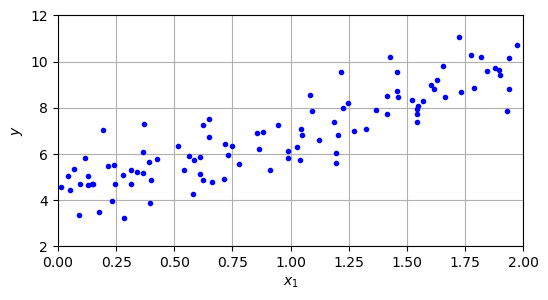

In [14]:

# 1. generate a toy data set with only one feature x1
np.random.seed(42) 
n = 100 
X = 2 * np.random.rand(n, 1) 
y = 4 + 3 * X + np.random.randn(n, 1) 

# 2. visualize the toy sata set
import matplotlib.pyplot as plt

fig1, axe1 = plt.subplots(figsize=(6, 3))
axe1.plot(X, y, "b.")
axe1.set(xlabel= "$x_1$", ylabel="$y$")
axe1.axis([0, 2, 2, 12])
axe1.grid()

In [11]:
# 3. Find the optimal parameters by the normal equation

X_b = np.c_[np.ones((n,1)),X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [12]:
# 4. make a prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

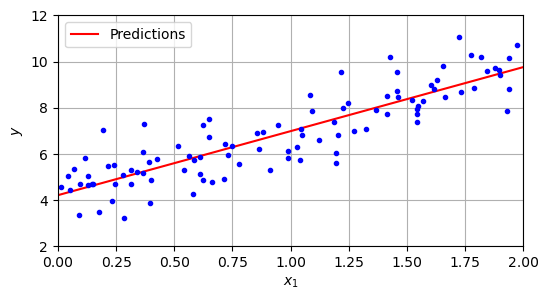

In [15]:
# 4. visualize the linear model
fig2, axe2 = plt.subplots(figsize=(6, 3))  # extra code – not needed, just formatting
axe2.plot(X_new, y_predict, "r-", label="Predictions")
axe2.plot(X, y, "b.")
axe2.set(xlabel="$x_1$", ylabel="$y$")
axe2.axis([0, 2, 2, 12])
axe2.grid()
axe2.legend(loc="upper left")

In [16]:
# 5. Find the optimized parameters using 
# the linear regression model in Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [17]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [18]:
# The LinearRegression class is based on 
# the np.linalg.lstsq() function 
# (the name stands for "least squares")
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- *np.linalg.lstsq()* computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ 
  - specifically the Moore-Penrose inverse 
    - can be computed with `np.linalg.pinv()` directly
- the Normal equation may not work if the matrix $\mathbf{X^T}\mathbf{X}$ is not invertible
  - but the pseudoinverse is always defined


In [19]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

Computational Complexity
---
Given a dataset with $n$ samples and $m$ features,

- to find the optimized parameters,
  - the Normal equation computes the inverse of $\mathbf{X^T}\mathbf{X}$
    - with complexity about $O(m^{2.4})$ to $O(m^2)$
  - the SVD approach used by Scikit-Learn’s LinearRegression class is about $O(m^2)$.
- to make predictions
  - the complexity is $O(n×m)$

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)
---
- a method for unconstrained mathematical optimization
- it tweaks parameters iteratively in order to minimize the cost function $F(\mathbf {x})$
  - along the direction of steepest descent, i.e.
  - the opposite direction of the current gradient of $F(\mathbf {x})$

$${\displaystyle \mathbf {x} _{n+1}=\mathbf {x} _{n}-\gamma_n \nabla F(\mathbf {x} _{n})}$$

  - which generates a monotonic sequence 
    
$${\displaystyle F(\mathbf {x} _{0})\geq F(\mathbf {x} _{1})\geq F(\mathbf {x} _{2})\geq \cdots}$$

  - $\gamma_n$ is the *learning rate* at step $n$